## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.head())
print(study_results.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [4]:
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
mice_number = len(mouse_df['Mouse ID'].unique())
mice_number

249

In [6]:
duplicates = mouse_df[['Mouse ID','Timepoint']].value_counts()
dup_df = pd.DataFrame(duplicates)
dup_df = dup_df.reset_index()
du_df = dup_df.loc[(dup_df[0] > 1)]
du_df.head(40)

,Mouse ID,Timepoint,0
0,g989,20,2
1,g989,15,2
2,g989,10,2
3,g989,5,2
4,g989,0,2


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
du_df = dup_df.loc[(dup_df[0] > 1)]
duplicate_list = list(du_df['Mouse ID'].unique())
print(duplicate_list)

['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = mouse_df.loc[(mouse_df["Mouse ID"] == 'g989')]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.loc[(mouse_df["Mouse ID"] != 'g989')]
mouse_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [10]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_df['Mouse ID'].unique()))

248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance,
#standard deviation, and SEM of the tumor volume for each regimen

regimen_df = mouse_df[['Drug Regimen', 'Tumor Volume (mm3)']]
regimen_tumor_df = regimen_df.groupby('Drug Regimen').agg(['mean','median', 'var', 'std', 'sem' ])
regimen_tumor_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
# Assemble the resulting series into a single summary dataframe.
print(type(regimen_tumor_df))

<class 'pandas.core.frame.DataFrame'>


## Bar and Pie Charts

<IPython.core.display.Javascript object>


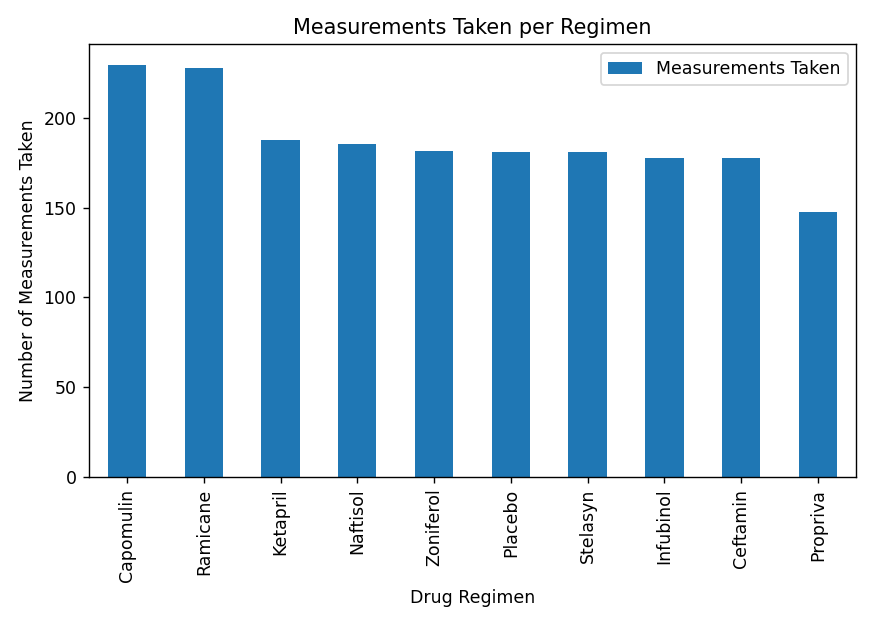

In [11]:
%matplotlib notebook
# Generate a bar plot showing the total number of
#measurements taken on each drug regimen using pandas.

regimen_count_df = pd.DataFrame(mouse_df['Drug Regimen'].value_counts().reset_index())
regimen_count_df.columns=['Drug Regimen', 'Measurements Taken']
regimen_count_df = regimen_count_df.set_index("Drug Regimen")
regimen_count_df.plot(kind='bar', figsize=(7,5))
plt.title("Measurements Taken per Regimen")
plt.ylabel("Number of Measurements Taken")
plt.tight_layout()
plt.show()

In [12]:
#reset index to make it easier to use pyplot
regimen_count_df = regimen_count_df.reset_index()
regimen_count_df

,Drug Regimen,Measurements Taken
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva']
[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]


<IPython.core.display.Javascript object>


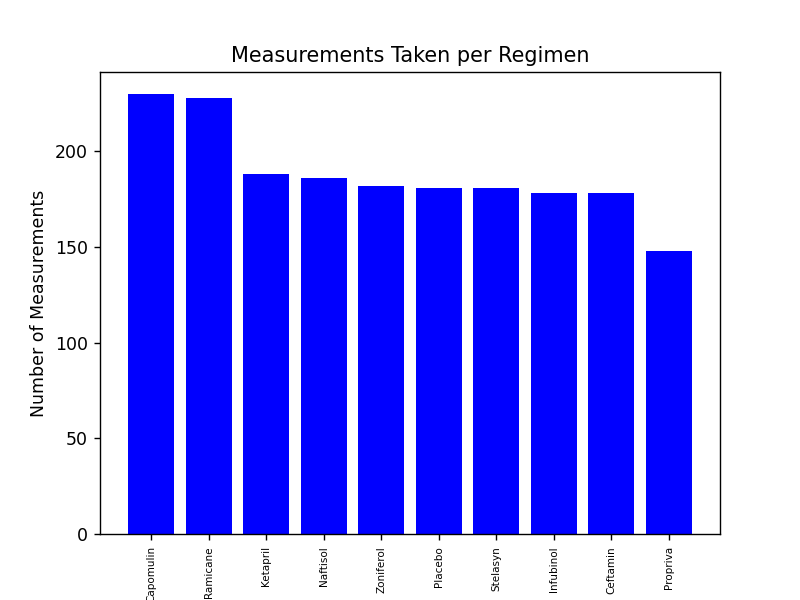

Text(0, 0.5, 'Number of Measurements')

In [13]:
%matplotlib notebook
from matplotlib.pyplot import figure
# Generate a bar plot showing the total number
#of measurements taken on each drug regimen using pyplot.

x_axis = list(regimen_count_df['Drug Regimen'])
y_axis = list(regimen_count_df['Measurements Taken'])
print(x_axis)
print(y_axis)
plt.bar(x_axis, y_axis, color = 'b', align = 'center')
plt.rcParams["figure.figsize"] = (8,8)
plt.title('Measurements Taken per Regimen')
plt.xticks(rotation='vertical', fontsize = 6)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#while this way of writing the code takes more lines than just looking at the value counts,
#when written in this way it is not hard coded, and could easily be updated if data on more
#mice needs to be analyzed

sex_df = pd.DataFrame(mouse_metadata['Sex'].value_counts()).reset_index()
sex_df.columns=['Sex','Count']
males = list(sex_df.values[0])
males = males[1]
females = list(sex_df.values[1])
females = females[1]
females = females - 1

#subtract one from the number of females, remembering we are not using any data related to 
#Mouse ID g989, which is female

123

<IPython.core.display.Javascript object>


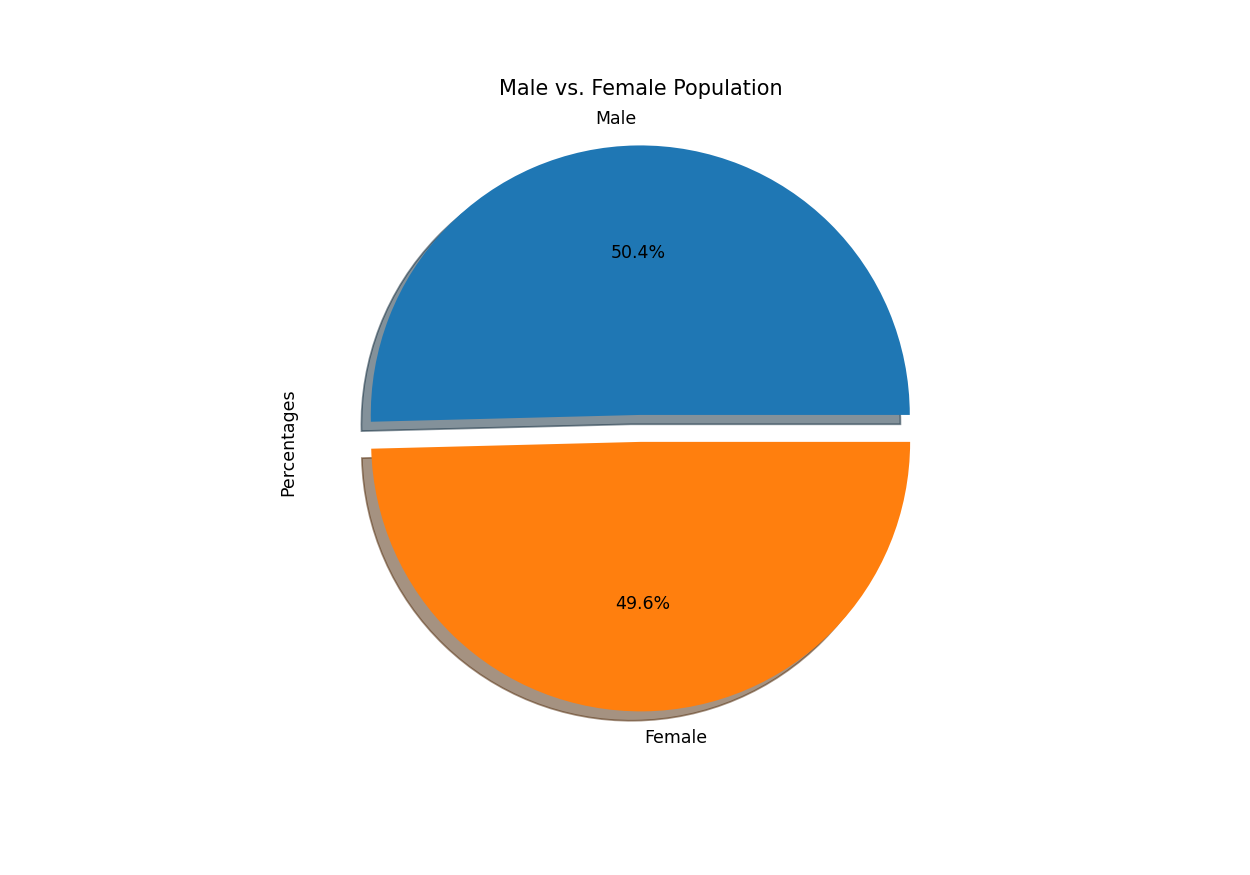

In [103]:
%matplotlib notebook
#Make the pandas pie chart
sex_df = pd.DataFrame({
    'Sex' : ['Males', "Females"],
    'Percentages' : [males, females]
})
explode = (.1,0)
sex_df['Percentages'].plot.pie( labels=['Male','Female'],figsize=(10,7),autopct='%1.1f%%', explode=explode,shadow=True)
plt.title('Male vs. Female Population')
xlabel=("d")

<IPython.core.display.Javascript object>


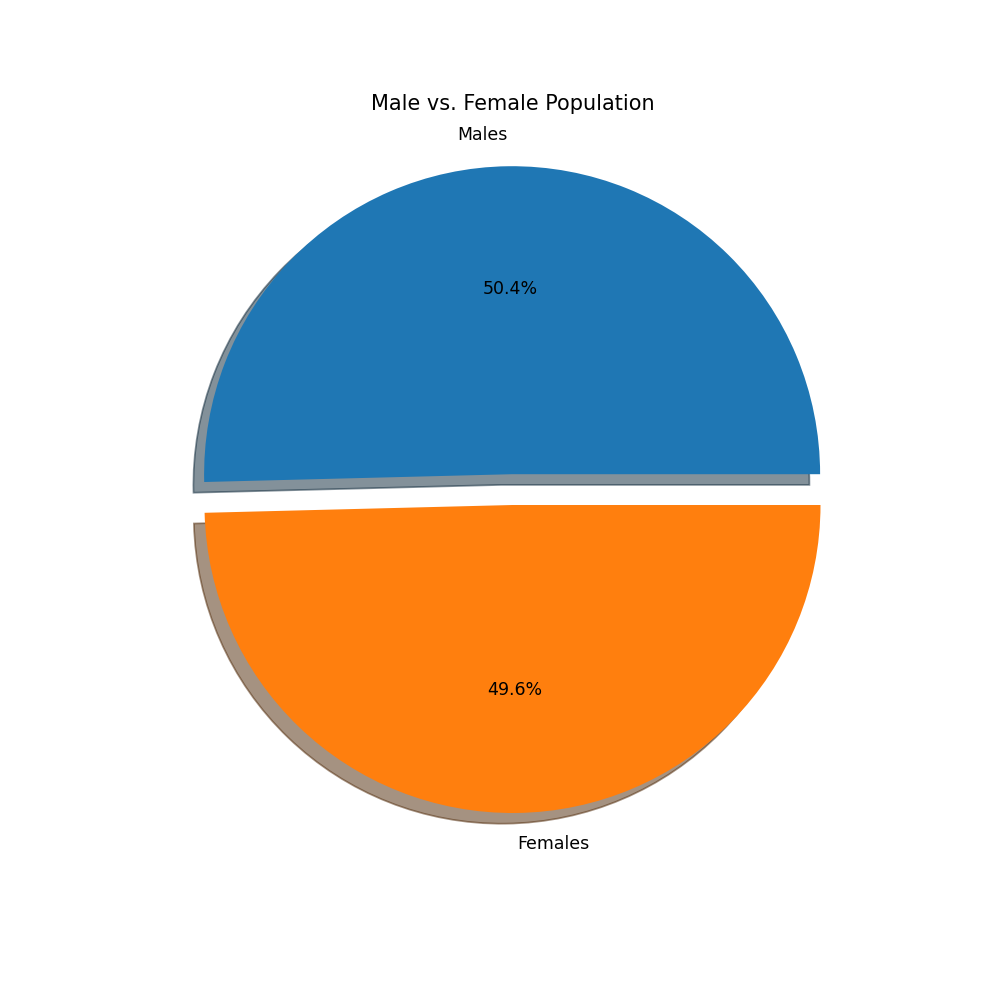

Text(0.5, 1.0, 'Male vs. Female Population')

In [104]:
%matplotlib notebook
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Males', 'Females']
mice =  [males,females]
plt.pie(mice, labels=labels, autopct="%1.1f%%", explode=explode,shadow=True)
plt.title('Male vs. Female Population')


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_medicines_df = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin") | (
                    mouse_df["Drug Regimen"] == "Ramicane") | (
                    mouse_df["Drug Regimen"] == "Infubinol") | (
                    mouse_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = top_medicines_df.groupby('Mouse ID').max()["Timepoint"] 
final_timepoints_df = pd.DataFrame(final_timepoints)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_top_four_df = pd.merge(final_timepoints_df, mouse_df, on = ("Mouse ID", "Timepoint"), how = 'left')
merged_top_four_df = merged_top_four_df.sort_values("Drug Regimen")
merged_top_four_df 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
49,l897,45,Capomulin,Male,17,19,38.846876,1
34,j119,45,Capomulin,Female,7,23,38.125164,1
35,j246,35,Capomulin,Female,21,21,38.753265,1
78,u364,45,Capomulin,Male,18,17,31.023923,3
26,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
37,j913,45,Ramicane,Female,4,17,31.560470,1
38,j989,45,Ramicane,Male,8,19,36.134852,1
40,k403,45,Ramicane,Male,21,16,22.050126,1
50,m546,45,Ramicane,Male,18,16,30.564625,1


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
top_four_list = ['Capomulin', 'Ceftamin', 'Ramicane', 'Infubinol']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = merged_top_four_df.loc[(merged_top_four_df["Drug Regimen"] == "Capomulin")]
ramicane = merged_top_four_df.loc[(merged_top_four_df["Drug Regimen"] == 'Ramicane')]
infubinol = merged_top_four_df.loc[(merged_top_four_df["Drug Regimen"] == 'Infubinol')]
ceftamin = merged_top_four_df.loc[(merged_top_four_df["Drug Regimen"] == 'Ceftamin')]

    # Determine outliers using upper and lower bounds
capomulin_quartiles = capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {capomulin_iqr}")
print(f"The the median of Capomulin is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [41]:
infubinol_quartiles = infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
print(f"The lower quartile of Infubinol is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {infubinol_iqr}")
print(f"The the median of Infubinol is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [43]:
ramicane_quartiles = ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
print(f"The lower quartile of Ramicane is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {ramicane_iqr}")
print(f"The the median of Ramicane is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [53]:
ceftamin_quartiles = ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
print(f"The lower quartile of Ceftamin is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {ceftamin_iqr}")
print(f"The the median of Ceftamin is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_four_tumor_data = [capomulin['Tumor Volume (mm3)'], ceftamin['Tumor Volume (mm3)'],
                      ramicane['Tumor Volume (mm3)'], infubinol['Tumor Volume (mm3)']]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Boxplot for Top Four Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(temperatures)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
